1. Предобработка данных:
   - Очистите данные от пропусков и аномалий.




In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [186]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### пропущенные слова только в целевой колонке Sleep Disorder

In [188]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [189]:
# заменим в колонке Sleep Disorder n/a на None
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

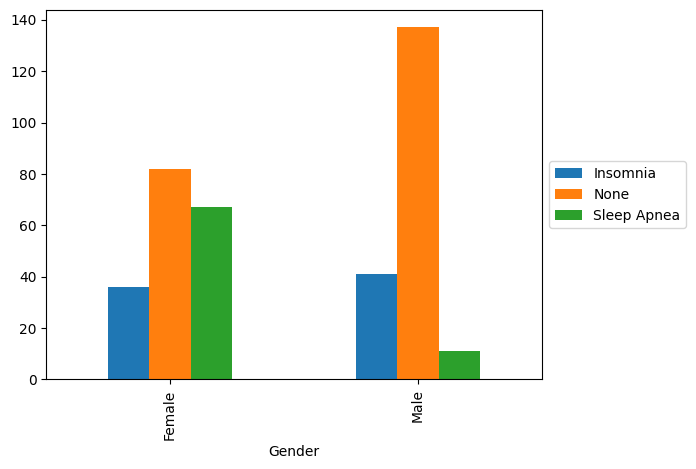

In [190]:
# проверим распределение ключевого признака по полам
pd.crosstab(df["Gender"],df["Sleep Disorder"]).plot(kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

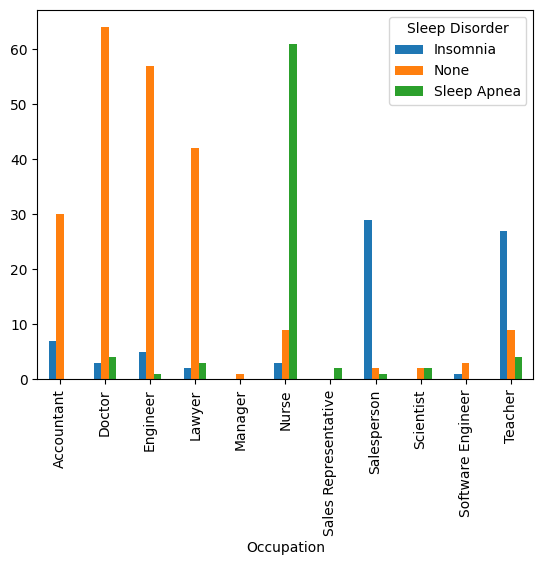

In [191]:
# # проверим распределение ключевого признака по должностям
pd.crosstab(df["Occupation"],df["Sleep Disorder"]).plot(kind="bar")
plt.show()

In [192]:
# удалим незначимый признак
df.drop("Person ID",axis=1,inplace=True)

In [193]:
# разделим давление Blood Pressure на две колонки
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)
df.drop(columns="Blood Pressure" , axis=1 ,inplace=True)

In [194]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


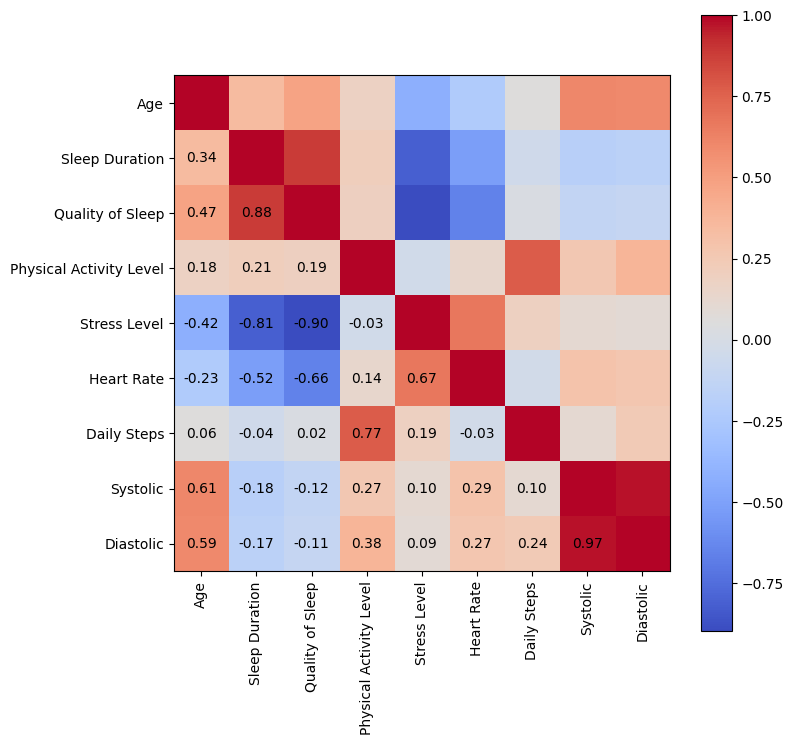

In [195]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

#### согласно матрицы корреляции особое влияние на сон оказывает физическая активность

   - Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding.

In [196]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [197]:
# закодируем избыточный вес BMI Category вручную, т.к. эта категориальная переменная ранжирована
def weight_encoder(weight):
    if weight== 'Obese':
        return 2
    if weight== 'Overweight':
        return 1
    else:
        return 0

df['BMI Category'] = df['BMI Category'].apply(weight_encoder)

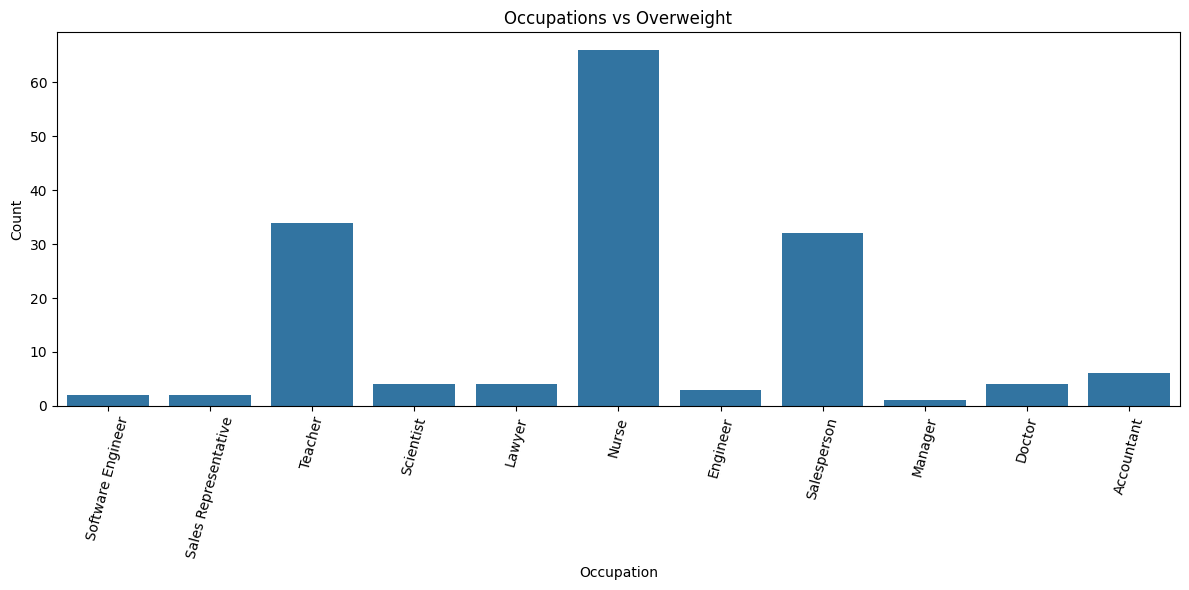

In [198]:
# посмотрим на распеределение
overweight_data = df[df['BMI Category'] > 0]
plt.figure(figsize=(12, 6))
sns.countplot(data=overweight_data, x='Occupation')
plt.title('Occupations vs Overweight')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=75)  
plt.tight_layout()
plt.show()

#### видим, что от избыточного веса больше всего страдают няни (nurse), за ними идут продажники и учителя.

In [199]:
# используем Label Encoding
from sklearn import preprocessing 
enc_cols = ['Gender', 'Occupation', 'Sleep Disorder']
label_encoder = {}

for col in enc_cols:
    label_encoder[col] = preprocessing.LabelEncoder()
    df[col] = label_encoder[col].fit_transform(df[col])

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,1,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [200]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,9,6.1,6,42,6,1,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [201]:
df.corr(numeric_only=True)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.242743,0.217105,-0.014509,-0.253415,-0.210527,-0.268378
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.427704,-0.225606,0.057973,0.232000,0.605878,0.593839
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.621570,0.043928,-0.105877,-0.169800,0.518561,0.521835
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.349605,-0.516455,-0.039533,0.177552,-0.180406,-0.166570
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.324413,-0.659865,0.016791,0.179592,-0.121632,-0.110151
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.052076,0.136971,0.772723,0.433214,0.265416,0.382651
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.157649,0.670026,0.186829,-0.036058,0.102818,0.091811
BMI Category,-0.242743,0.427704,0.621570,-0.349605,-0.324413,0.052076,0.157649,1.000000,0.469897,-0.142785,0.034457,0.740201,0.736578
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.469897,1.000000,-0.030309,0.205987,0.294143,0.271092
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,-0.142785,-0.030309,1.000000,0.342098,0.103342,0.241986


#### зависимость целевой переменной от физической активности остается, таким образом кодирование не повлияло на матрицу корреляции 
необходимо отметить высокую степень корреляции между: Quality of Sleep/Sleep Duration (88%) и Stress Level/Sleep Duration (81%) и Physical Activity Level/Daily Steps (77%) и  Stress Level/Heart Rate (66%)

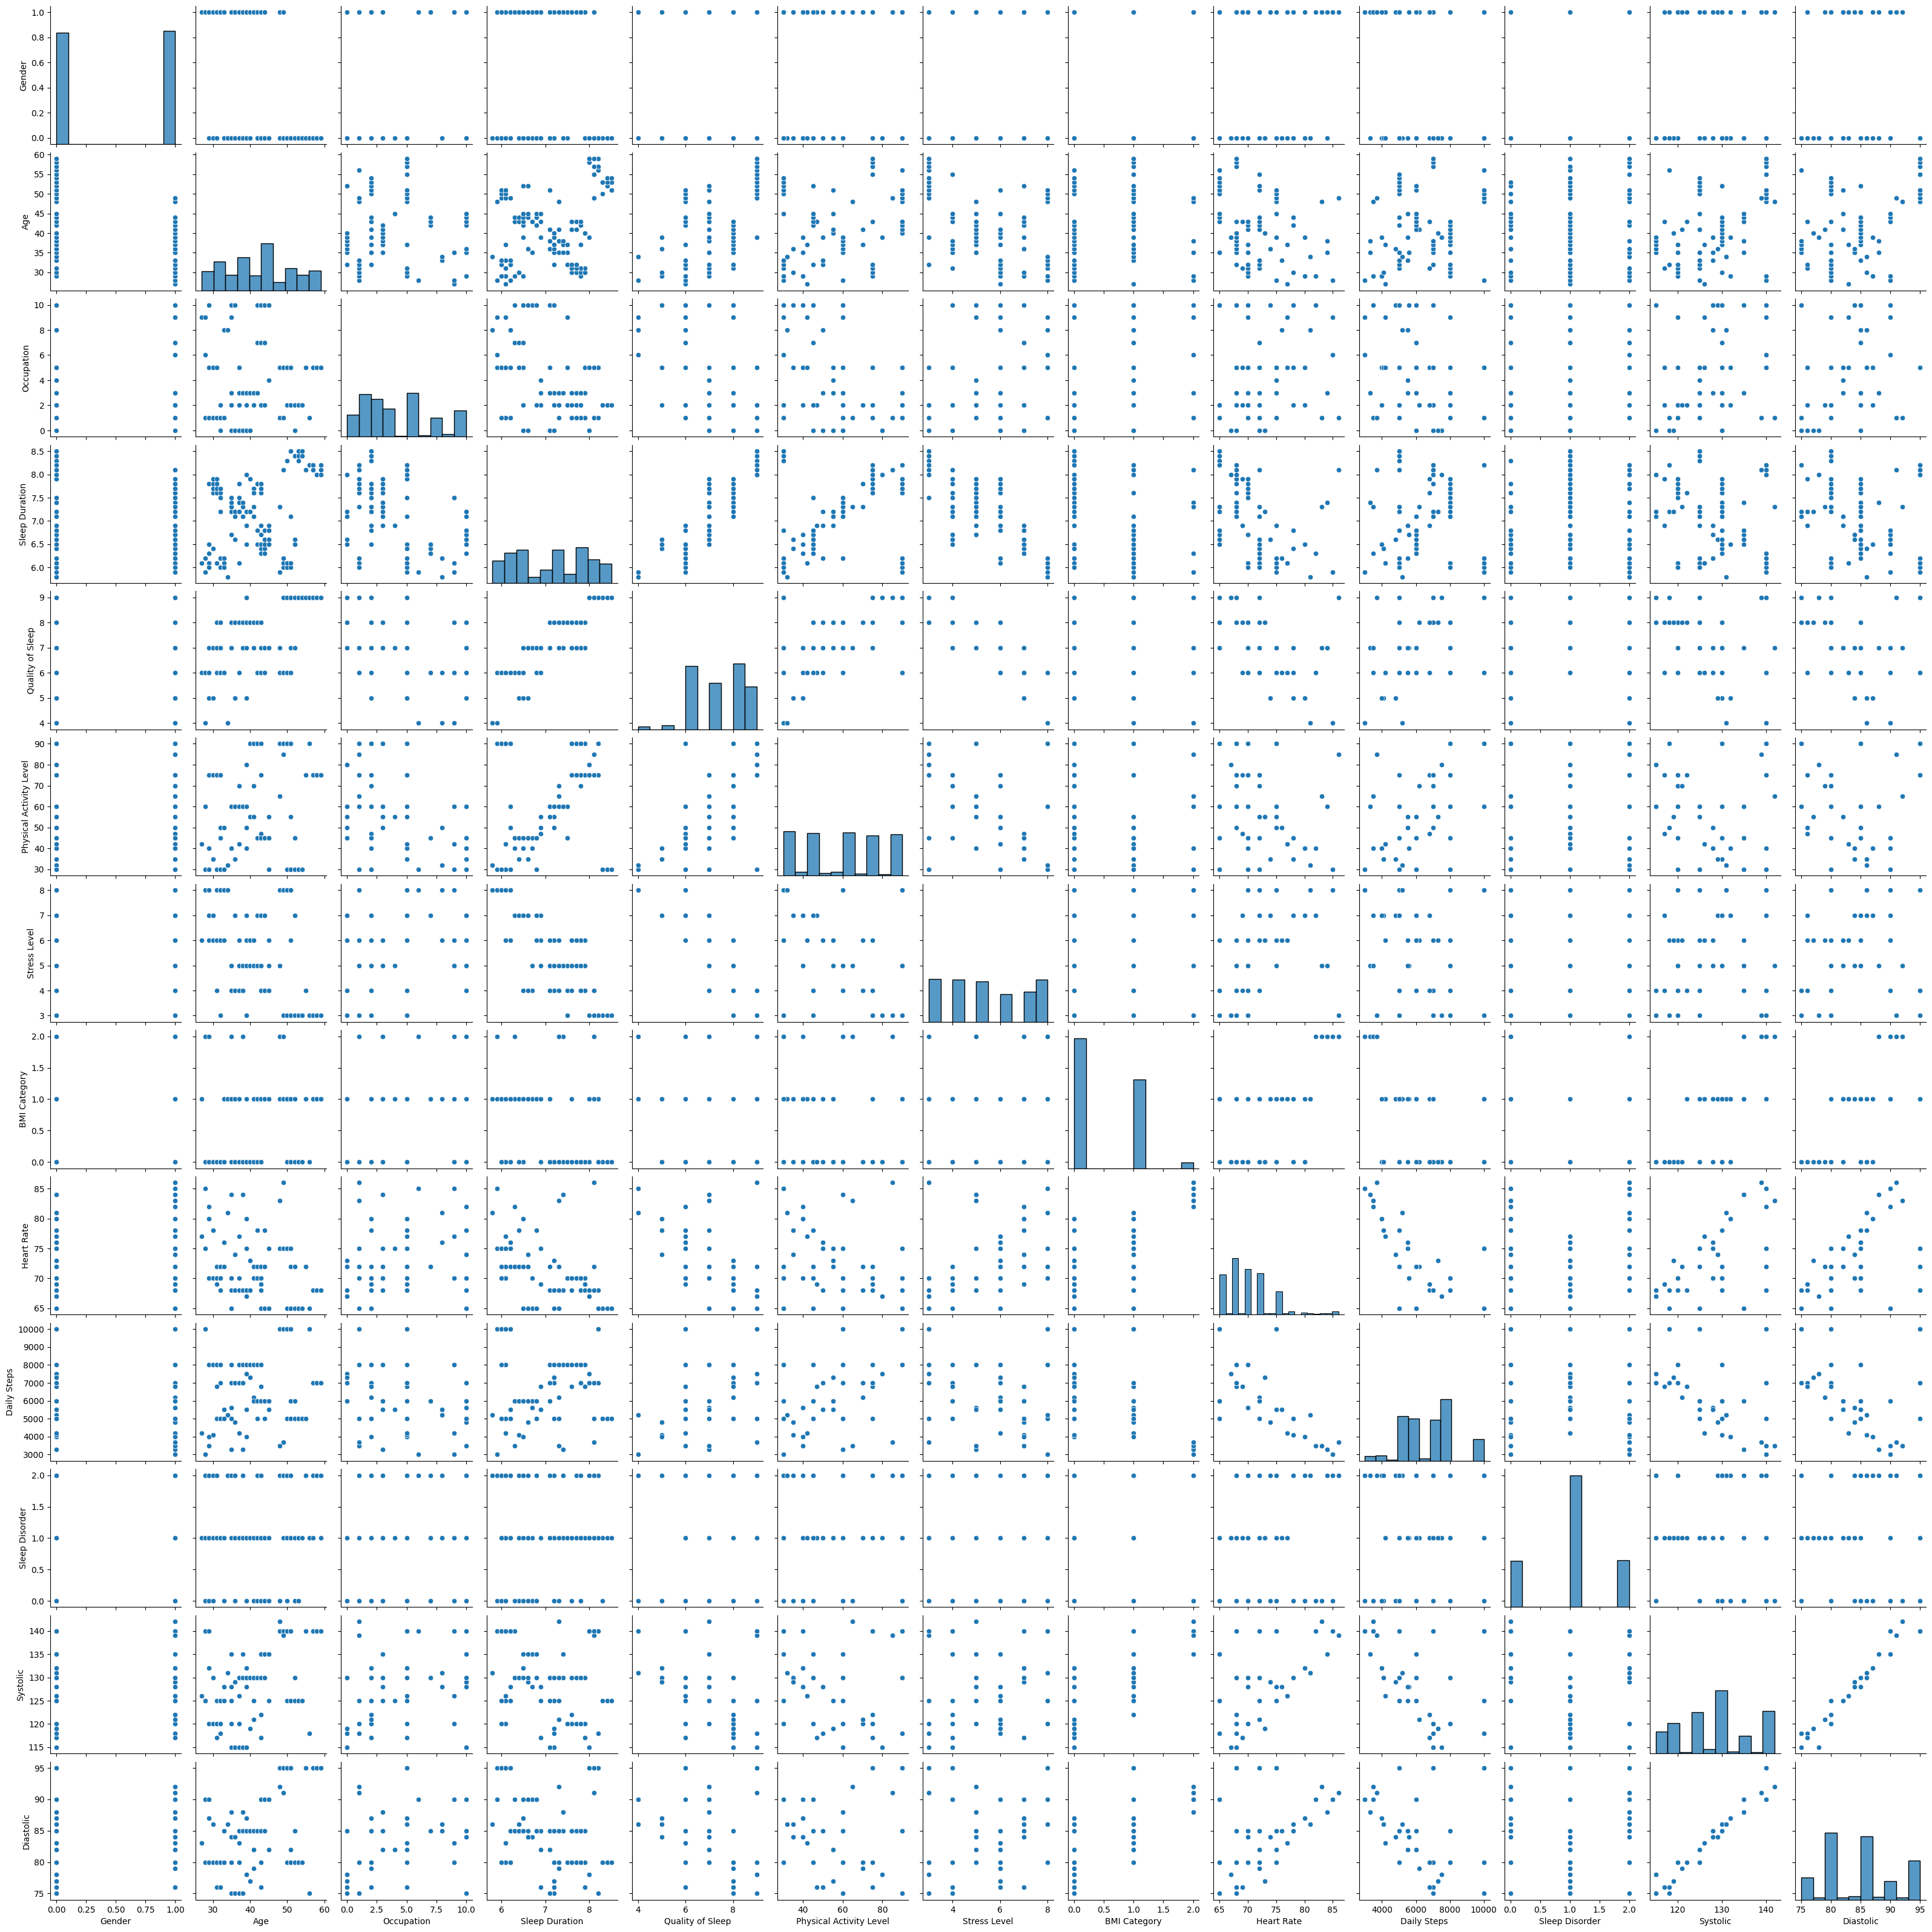

In [202]:
import seaborn as sns
sns.pairplot(df)

#### pairplot показывает дополнительные зависимости: Systolic(Diastolic)/Daily Steps и Systolic(Diastolic)/Daily Steps

2. Генерация новых признаков:
   - Создайте комбинированные признаки, которые могут помочь улучшить модель.
   - Используйте полиномиальные признаки для числовых переменных.



In [203]:
# создадим признак высокого/низкого давления (гипертония)
def classify_bp(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80:
        return 0
    elif 120 <= row['Systolic'] < 140 or 80 <= row['Diastolic'] < 90:
        return 1
    else:
        return 2

df['BP Category'] = df.apply(classify_bp, axis=1)

In [204]:
df['BP Category'].value_counts()

BP Category
1    262
2     71
0     41
Name: count, dtype: int64

In [205]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
0,1,27,9,6.1,6,42,6,1,77,4200,1,126,83,1
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,1
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,1
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90,2
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90,2


<Axes: title={'center': 'Distribution of  BP Category'}, ylabel='count'>

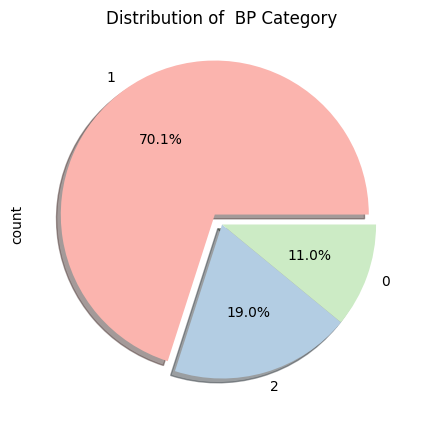

In [206]:
colors = plt.get_cmap('Pastel1').colors
df["BP Category"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5), title='Distribution of  BP Category', explode=(0.08, 0 ,0) , shadow=True , colors=colors)

In [207]:
# декодируем признаки чтобы построить график по должностям
enc_cols = ['Occupation']
df_decoded = df.copy()
for col in enc_cols:
    df_decoded[col] = label_encoder[col].inverse_transform(df_decoded[col])

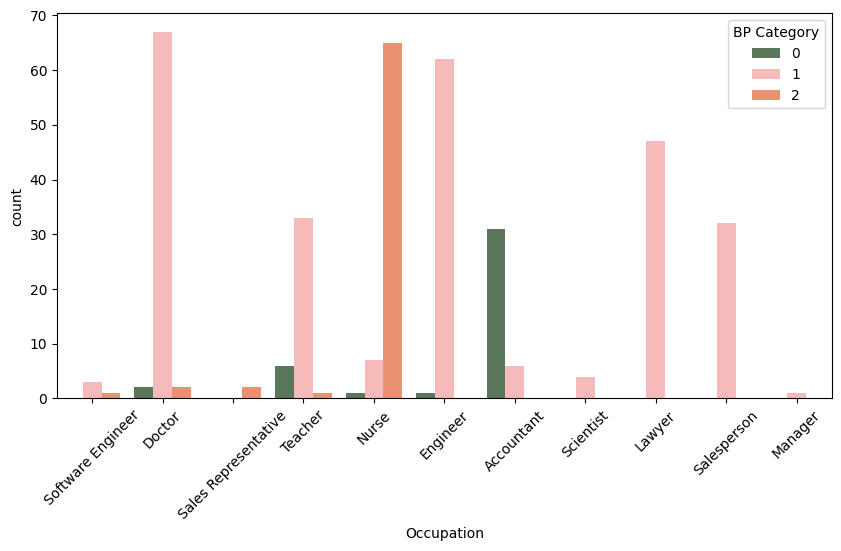

In [208]:
# оценим, какие профессии как распределены по наличию гипертонии
plt.figure(figsize=(10,5))
ax = sns.countplot(data= df_decoded , x="Occupation" , hue="BP Category" ,palette=["#557C56" ,"#FFB1B1", "#FF885B"])
ax.tick_params(axis='x', labelrotation=45)

In [209]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,0.449198,70.165775,6816.844920,1.002674,128.553476,84.649733,1.080214
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,0.549274,4.135676,1617.915679,0.644626,7.748118,6.161611,0.542048
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,1.000000,125.000000,80.000000,1.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,1.000000,130.000000,85.000000,1.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000,1.000000,135.000000,90.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,2.000000,86.000000,10000.000000,2.000000,142.000000,95.000000,2.000000


In [210]:
# создадим признак возраста
df_copy = df.copy()
age_bins = [20, 35, 45, 60]
age_labels = [1, 2, 3]
df_decoded['Age_cat'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
df['Age_cat'] = df_decoded['Age_cat']
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category,Age_cat
0,1,27,9,6.1,6,42,6,1,77,4200,1,126,83,1,1
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,1,1
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,1,1
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90,2,1
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90,2,1


In [211]:
df['Age_cat'].value_counts()

Age_cat
2    170
3    110
1     94
Name: count, dtype: int64

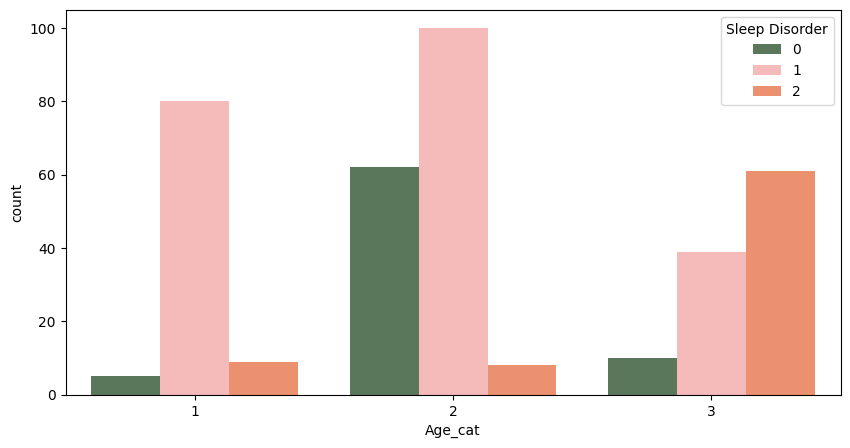

In [212]:
# рассмотрим распределение людей с лишним весом по возрастам
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df , x="Age_cat" , hue="Sleep Disorder" ,palette=["#557C56" ,"#FFB1B1", "#FF885B"])

3. Отбор признаков:
   - Примените несколько методов отбора признаков (например, RFE, SelectKBest).
   - Сравните качество модели до и после отбора признаков.



In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    int64   
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    int64   
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    int64   
 8   Heart Rate               374 non-null    int64   
 9   Daily Steps              374 non-null    int64   
 10  Sleep Disorder           374 non-null    int64   
 11  Systolic                 374 non-null    int64   
 12  Diastolic                374 non-null    int64   
 13  BP Category              374 non-null    int64   
 14  Age_cat   

In [214]:
from sklearn.model_selection import train_test_split
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [215]:
# построим модель ЛОгистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, classification_report
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

print(f'R^2 на тренировочных данных (LogReg) {r2_score(y_train, lr.predict(X_train))}')
print(f'R^2 на тестовых данных (LogReg) {r2_score(y_test, lr.predict(X_test))}')

# Classification reports for different algorithms
lr_report = classification_report(y_test, prediction)
# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_report)

R^2 на тренировочных данных (LogReg) 0.7073091146399826
R^2 на тестовых данных (LogReg) 0.46875
[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.93      0.95      0.94        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.89      0.89      0.89        75



In [216]:
from sklearn.feature_selection import RFE
# Создаем RFE модель и выбираем 3 признака
rfe = RFE(estimator=lr, n_features_to_select=11)
rfe = rfe.fit(X, y)

# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))

                    Feature  Ranking
9               Daily Steps        4
5   Physical Activity Level        3
2                Occupation        2
1                       Age        1
3            Sleep Duration        1
0                    Gender        1
4          Quality of Sleep        1
6              Stress Level        1
7              BMI Category        1
8                Heart Rate        1
10                 Systolic        1
11                Diastolic        1
12              BP Category        1
13                  Age_cat        1


In [217]:
# отберем несколько самых важных признаков
top_features = selected_features.sort_values(by='Ranking', ascending=False)[:11]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]

# Обучение логистической регрессии на отобранных признаках
dt = LogisticRegression(solver='liblinear', random_state=42)
dt.fit(X_train_selected, y_train)
print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))}')

# Classification reports for different algorithms
lr_report = classification_report(y_test, dt.predict(X_test_selected))
# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_report)

R^2 на тренировочных данных 0.6016151838155319
R^2 на тестовых данных 0.5
[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.93      0.98      0.95        43
           2       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.91      0.91      0.90        75



#### модель ухудшила результаты после отбора признаков

In [218]:
# сортируем признаки по важности
from sklearn.inspection import permutation_importance
# model_fi = permutation_importance(lr, X_train, y_train)
model_fi = permutation_importance(lr, X_test, y_test)
coef_mean  = [round(float(x), 3) for x in model_fi['importances_mean']]
coef_dict = dict(zip(X_test.columns, coef_mean))
print(dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)))



{'Diastolic': 0.392, 'Systolic': 0.165, 'Age': 0.125, 'Daily Steps': 0.101, 'Heart Rate': 0.061, 'Quality of Sleep': 0.051, 'Physical Activity Level': 0.043, 'BP Category': 0.019, 'Stress Level': 0.013, 'Gender': 0.008, 'Age_cat': 0.008, 'Occupation': 0.005, 'Sleep Duration': 0.005, 'BMI Category': 0.005}


In [219]:
# попробуем отобрать признаки, выбранные самой моделью как самые важные
top_features = ['Diastolic', 'Age', 'Systolic', 'Daily Steps', 'Heart Rate']
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Обучение дерева решений на отобранных признаках
dt = LogisticRegression(solver='liblinear', random_state=42)
dt.fit(X_train_selected, y_train)
print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))}')

# Classification reports for different algorithms
lr_report = classification_report(y_test, dt.predict(X_test_selected))
# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_report)

R^2 на тренировочных данных 0.4308788340221884
R^2 на тестовых данных -0.03125
[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.78      0.98      0.87        43
           2       0.91      0.62      0.74        16

    accuracy                           0.76        75
   macro avg       0.73      0.64      0.66        75
weighted avg       0.75      0.76      0.74        75



#### модель также ухудшила свои результаты после отбора (6) признаков

#### Вывод: изменение количества признаков (уменьшение/увеличение) не помогло улучшить обучение модели. При всех изменениях модель Логистической регрессии ухудшало показатели

4. Подбор гиперпараметров:
   - Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.
   - Оцените, как изменение гиперпараметров влияет на качество предсказаний.


In [220]:
# построим модель ЛОгистической регрессии и найдем оптимальные гиперпараметры
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'tol': [0.00001, 0.0001, 0.001]
}
# lr = LogisticRegression(solver='liblinear', penalty='l1', C=10.0, tol=0.0001)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Лучшие гиперпараметры (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

# Classification reports for different algorithms
lr_report = classification_report(y_test, lr.predict(X_test))
# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_report)

/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/user77/Desktop

Лучшие гиперпараметры (Grid Search): {'C': 100.0, 'penalty': 'l1', 'tol': 1e-05}
Лучшая оценка (Grid Search): 0.66
[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.93      0.95      0.94        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.89      0.89      0.89        75



/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [221]:
# построим модель RandomForestClassifier и найдем оптимальные гиперпараметры
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [ 3, 5, 7, 9],
    'max_features': [ 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(criterion='gini',)
rf.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Лучшие гиперпараметры (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

# Classification reports for different algorithms
rf_report = classification_report(y_test, rf.predict(X_test))
# Plot classification reports
print("[ RandomForest report ]\n")
print(rf_report)

Лучшие гиперпараметры (Grid Search): {'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
Лучшая оценка (Grid Search): 0.69
[ RandomForest report ]

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [222]:
# построим модель RandomForestClassifier и найдем оптимальные гиперпараметры с помощью RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [ 3, 5, 7, 9],
    'max_features': [ 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(criterion='gini',)
rf.fit(X_train, y_train)
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='r2', cv=5, n_iter=20)
grid_search.fit(X_train, y_train)


print(f"Лучшие гиперпараметры (Random Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Random Search): {grid_search.best_score_:.2f}")

# Classification reports for different algorithms
rf_report = classification_report(y_test, rf.predict(X_test))
# Plot classification reports
print("[ Random Forest report ]\n")
print(rf_report)


Лучшие гиперпараметры (Random Search): {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 7, 'criterion': 'log_loss'}
Лучшая оценка (Random Search): 0.67
[ Random Forest report ]

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



#### Выводы: 
1. RandomizedSearchCV подобрало гиперпараметры отличные от GridSearchCV, и при этом качество модели у RandomizedSearchCV ниже.
2. изменения гиперпараметров влияет на качество модели критически - иногда модель не способна предсказывать.